# Relatório 
# Fórmulas de Integração Numérica de Gauss

### Gabriel Souza Lima 11820106
### Lucas Pereira da Fonseca  11808126

## Introdução
 Em alguns problemas envolvendo a integração de uma função $f(x):$  de a até b, nos deparamos com funções que não podem ser integradas analiticamente, ou então conhecemos apenas alguns pontos dessa função. Em ambos os casos, pode-se tentar aproximar a integral utilizando-se métodos numéricos. 
 Uma das formas de fazer tal aproximação é utilizar uma combinação linear de valores de $f(x)$, tal que:
  $$\int_{a}^{b}f(x)\ dx \ \approx \ \sum_{i=1}^{n}w_i f(x_i), \ x_i \in [a,b] \ \ \ \ \ \ (1)$$
 A quadratura de Gauss é um dos métodos utilizados para encontrar os pesos $w_i$ e os nós $x_i$ de forma a aproximar a integral $\int_{a}^{b} f(x)\ dx$.
 
## Fórmulas de Integração de Gauss
 Na quadratura de Gauss, define-se os nós e os pesos de forma a minimizar o erro feito pela aproximação (1) e de forma que o erro $E(x)$ da aproximação seja zero para polinômios com grau menor ou igual a $2n-1$. \\
 Ao impormos que a equação (1) será exata para $x^k, 0\leq k\leq 2n-1$ iremos obter 2n equações. Assim, concluímos que a expressão será exata para polinômios $P_m(x), \ 0\leq m \leq 2n-1$.
 Além disso, seja $P(x) = (x-x_1)(x-x_2)...(x-x_n)q(x)$, onde q tem grau menor ou igual a $n-1$, temos $$ \int_{a}^{b} P(x)\ dx \ = \ 0 \ \ \ \ \ \ (2)$$ uma vez que, ao fazermos $\int_{a}^{b}P(x)\ dx \ = \ \sum_{i=1}^{n}w_i (x-x_1)(x-x_2)...(x-x_n)q(x)$, todos $x_i, 0\leq i \leq n$ serão raízes do polinômio e irão zerar a expressão. 
 Ainda sobre a expressão (2), percebemos que $\tilde{P} = (x-x_1)(x-x_2)...(x-x_n)$ e $q(x)$ serão ortogonais em relação ao produto interno $<u,v> = \int_{a}^{b} u\cdot {v}dx$. 
 Dessa forma, podemos utilizar os polinômios ortogonais de Legendre, definidos como $<u,v> = \int_{-1}^{1} u\cdot {v}dx \ = \ 0$ para montar $2n-1$ equações e determinar os valores dos nós $x_i$ e dos pesos $w_i$ para qualquer $n$. 
 Os nós e os pesos para diversos valores de $n$ já foram calculados anteirormente e tabelados. São tais nós e pesos que iremos utilizar aqui. No caso, usaremos $n = 6, \ 8$ e $10$.

## Mudança de variável
 Em muitos casos, os limites de integração $[a,b]$ não serão $[-1,1]$, para os quais os pesos e os nós foram calculados. Quando esse for o caso, precisaremos transportá-los para o intervalo $[a,b]$. Conforme dito no enunciado, os nós são linearmente transportados e os pesos são multiplicados por um fator de escala.
 Seja $x$ um ponto no intervalo $[-1,1]$, para transportá-lo ao intervalo a um intervalo $[a,b]$ qualquer, fazemos $y = c_0 + c_1x$. Calculando a expressão nos limites dos intervalos, temos que:
 $$1 = c_0 + c_1 \\
-1 = c_0 - c_1 \newline$$
Resolvendo o sistema, chegamos na expressão para os novos nós: $y_i=[x_i(b-a)+a+b]/2$, onde $x_i$ é o valor do nó $i$ no intervalo $[-1,1]. \\$
Quanto aos pesos, já que eles seguem uma relação proporcional, podemos montar a equação: $\frac{v_i}{b-a} = \frac{w_i}{1-(-1)} = \frac{w_i}{2}$. Dessa forma, os valores do peso $v_i$ no intervalo $[a,b]$ é dado por: $v_i = \frac{w_i \cdot (b-a)}{2}$, onde $w_i$ é o valor do peso $i$ no intervalo $[-1,1]$.

## Integrais duplas
Os exercícios que devemos resolver nesse exercício programa envolvem calcular a integral dupla de funções. Para isso, podemos aproveitar a quadratura de Gauss para aproximar a integral dupla de uma função $f(x,y)$ em um intervalo $[a,b]$ $$\int_{a}^{b} \int_{c}^{d} f(x,y)\ dydx$$ Basta chamarmos $\int_{c}^{d} f(x,y)\ dy$ de $F(x)$, pois $$\int_{a}^{b} F(x)\ dx = \sum_{i=1}^{n}u_i F(x_i)$$ onde $x_i$ e $u_i$ são os nós e pesos no intervalo $[a,b]$. Além disso, $$F(x_i) = \sum_{j=1}^{n}v_{ij} f(x_i,y_{ij})$$ onde $y_i$ e $v_{ij}$ são os nós e pesos no intervalo $[c(x_i),d(x_i)]$

### Solução
Agora, vamo implementar as ideias acima e resolver os exemplos propostos.

## Importando as bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import math
import time

### Definindo os nós e os pesos de acordo com a quantidade de pontos
A função cria_nos_pesos() irá gerar os nós e os pesos de acordo com o número de pontos que o usuário definir.

### Definindo os nós e os pesos de acordo com a quantidade de pontos

In [4]:
def cria_nos_pesos(n):
    """Cria os nós e os pesos que serão utilizados para calcular as integrais
    Args: 
        n:  quantidade de pontos
    Return:
        x: nós 
        w: pesos"""
    if n == 6:
        x = np.array([-0.2386191860831969086305017,-0.6612093864662645136613996,-0.9324695142031520278123016,
                        0.2386191860831969086305017,0.6612093864662645136613996,0.9324695142031520278123016])
        w = np.array([0.4679139345726910473898703,0.3607615730481386075698335,0.1713244923791703450402961,
                        0.4679139345726910473898703,0.3607615730481386075698335,0.1713244923791703450402961])
    elif n == 8:
        x = np.array([-0.1834346424956498049394761,-0.5255324099163289858177390,-0.7966664774136267395915539,-0.9602898564975362316835609,
                        0.1834346424956498049394761,0.5255324099163289858177390,0.7966664774136267395915539,0.9602898564975362316835609])
        w = np.array([0.3626837833783619829651504,0.3137066458778872873379622,0.2223810344533744705443560,0.1012285362903762591525314,
                        0.3626837833783619829651504,0.3137066458778872873379622,0.2223810344533744705443560,0.1012285362903762591525314])
    elif n == 10:
        x = np.array([-0.1488743389816312108848260,-0.4333953941292471907992659,-0.6794095682990244062343274,-0.8650633666889845107320967,-0.9739065285171717200779640,
                         0.1488743389816312108848260,0.4333953941292471907992659,0.6794095682990244062343274,0.8650633666889845107320967,0.9739065285171717200779640])
        w = np.array([0.2955242247147528701738930,0.2692667193099963550912269,0.2190863625159820439955349,0.1494513491505805931457763,0.0666713443086881375935688,
                         0.2955242247147528701738930,0.2692667193099963550912269,0.2190863625159820439955349,0.1494513491505805931457763,0.0666713443086881375935688])
    return x, w


### Integral 

Abaixo, iremos criar e testar a função calcula_integral(), que calcula a integral de uma função f(x) com limites constantes.

In [5]:
def calcula_integral(n,a,b,f):
    """Calcula a integral de uma função com limites inferior e superior constantes
    Args: 
        a: limite inferior
        b: limite superior
        f: função a ser integrada
        n: número de pontos"""
    x, w = cria_nos_pesos(n) #gerando os nós e os pesos
    x_t = (x*(b-a)+a+b)/2 #transportando os nós para o intervalo [a,b]
    w_t = w*(b-a)/2 #transportando os pesos para o intervalo [a,b]
    F = f(x_t) #calculando f(x) para os valores transportados
    I = F @ w_t  #calculando a integral
    return I

### Testando a integral única
Agora, vamos testar a função que calcula uma integral simples.

In [5]:
f = lambda x: x**2 #definindo a função f(x) = x^2

I = calcula_integral(n,-2,3,f) #calculando a integral
print(f"A integral x^2 de -2 até 3 é: {I} \n")

print(f"O valor de n é: {n}")

A integral x^2 de -2 até 3 é: 11.666666666666668 

O valor de n é: 6


In [6]:
f = lambda x: math.e ** x #definindo a função f(x) = e^x

I = calcula_integral(n,0,1,f) #calculando a integral
print(f"A integral e^2 de -1 até 1 é: {I} \n")

print(f"O valor de n é: {n}")

A integral e^2 de -1 até 1 é: 1.7182818284590446 

O valor de n é: 6


### Integral Dupla
Abaixo, implementamos a função calcula_integral_dupla(), que irá calcular a integral dupla de f(x,y) usando a quadratura de Gauss.
A ideia é implementar a expressão $$\sum_{i=1}^{n}u_i \sum_{j=1}^{n}v_{ij} f(x_i,y_{ij})$$lembrando de recalcular os nós e os pesos para cada intervalo $[c(x_i),d(x_i)]$. E, quando os limites de integração de y estão em função de x, implementar $$\sum_{i=1}^{n}v_i \sum_{j=1}^{n}u_{ij} f(x_{ij},y_i)$$ recalculando os nós e os pesos para o novo intervalo $[a(y_i),b(y_i)]$. Caso todos os limites de integração sejam constantes, nós apenas deixamos de calcular os nós e os pesos a cada iteração em $i$.

In [6]:
def calcula_integral_dupla(n,a,b,c,d,f):
    """Calcula a integral dupla da função f(x,y)
    Args:
        a: limite inferior de x
        b: limite superior de x
        c_func: limite inferior de y
        d_func: limite superior de y
        f: função f(x,y) a ser integrada
        n: número de pontos
    Return:
        I: valor da integral"""
    
    x, w = cria_nos_pesos(n) #criando os nós e os pesos
    
    I = 0
    
    #se os limites de integração são constantes
    if type(a) in (int, float) and type(b) in (int, float) and type(c) in (int, float) and type(d) in (int, float): 
        y_t = (x*(d-c)+c+d)/2 #transportando os nós para o intervalo [c,d]
        v_t = w*(d-c)/2 #transportando os pesos para o intervalo [c,d]

        x_t = (x*(b-a)+a+b)/2 #transportando os nós para o intervalo [a,b]
        u_t = w*(b-a)/2 #transportando os pesos para o intervalo [a,b]

        I = 0
        for i in range(n):
            s = 0
            for j in range(n):          
                s += v_t[j]*f(x_t[i],y_t[j])
            I += s*u_t[i]
    #se os limites de integração de y estão em função de x
    elif (type(c) not in (int, float)) or (type(d) not in (int, float)): 
        
        x_t = (x*(b-a)+a+b)/2 #transportando os nós para o intervalo [a,b]
        u_t = w*(b-a)/2 #transportando os pesos para o intervalo [a,b]
        
        for i in range(n):
            s = 0
            
            c_i = c(x_t[i]) #calculando o limite inferior c(xi)
            d_i = d(x_t[i]) #calculando o limite superior d(xi)

            y_t = (x*(d_i-c_i)+c_i+d_i)/2 #transportando os nós para o intervalo [c(xi), d(xi)]
            v_t = w*(d_i-c_i)/2 #transportando os pesos para o intervalo [c(xi), d(xi)]
            
            for j in range(n):
                s += v_t[j]*f(x_t[i],y_t[j])
                
            I += s*u_t[i]
    
    #se os limites de integração de y estão em função de x
    elif (type(a) not in (int, float)) or (type(b) not in (int, float)): 
        
        y_t = (x*(d-c)+d+c)/2 #transportando os nós para o intervalo [c,d]
        v_t = w*(d-c)/2 #transportando os pesos para o intervalo [c,d]
        
        for i in range(n):
            s = 0
            
            a_i = a(y_t[i]) #calculando o limite inferior a(xi)
            b_i = b(y_t[i]) #calculando o limite superior b(xi)

            x_t = (x*(b_i-a_i)+b_i+a_i)/2 #transportando os nós para o intervalo [a(xi), b(xi)]
            u_t = w*(b_i-a_i)/2 #transportando os pesos para o intervalo [a(xi), b(xi)]
            
            for j in range(n):
                s += u_t[j]*f(x_t[j],y_t[i])
                
            I += s*v_t[i]
    return I

# Exemplo 1
O volume de um cubo com lados unitários é definido como:
$$
\int_{0}^{1} \int_{0}^{1} 1 \,dx dy
$$

In [7]:
n = 6 #definindo o número de pontos

f = lambda x, y: 1 + 0*x + 0*y #definindo a função f(x,y)
a = 0 #limite inferior de x
b = 1 #limite superior de x
c = 0 #limite inferior de y 
d = 1 #limite superior de y 

inicio = time.time()

volume = calcula_integral_dupla(n,a,b,c,d,f)
print(f"O volume do cubo é: {volume} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} segundos.")

O volume do cubo é: 1.0 

O valor de n é: 6 

A duração foi de: 0.0009627342224121094 segundos.


#### Avaliação do resultado
O volume de um cubo de lados iguas a 1 é: 1 x 1 x 1 = 1. Portanto, observamos que a função calculou corretamente a integral.

### Volume do tetraedro
Podemos calcular o volume do tetraedro de vértices (0,0,0), (1,0,0), (0,1,0) e (0,0,1) pela integral:
$$
\\ \int_{0}^{1} \int_{0}^{1-x} (1-x-y) \,dy dx
$$
<br>
<img src='3.jpeg' width = '300' height = '300'>
<br>




In [8]:
n = 6 #definindo o número de pontos

f = lambda x, y: 1 - x - y #definindo a função f(x,y) = 1 - x - y

a = 0 #limite superior de x
b = 1 #limite inferior de x
c = lambda x: 0 + 0*x #limite inferior de y em função de x
d = lambda x: 1 - x #limite superior de y em função de x

inicio = time.time()

volume = calcula_integral_dupla(n,a,b,c,d,f) #calculando o volume
print(f"O volume do tetraedro é: {volume} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} s.")

O volume do tetraedro é: 0.16666666666666663 

O valor de n é: 6 

A duração foi de: 0.0010066032409667969 s.


#### Avaliação do resultado
O volume de um tetraedro pode ser obtido facilmente pela integração da função. Novamente, o resultado foi próximo ao esperado de 1/6 unidades de volume.

### Exemplo 2

Agora, vamos calcular a área da região do primeiro quadrante limitada por $y = 1 - x^2$
$$
\int_{0}^{1} \int_{0}^{1-x^2} 1 \,dy dx
$$

In [9]:
n = 6 #definindo o número de pontos

f = lambda x, y: 1 + 0*x + 0*y #definindo a função f(x,y)

a = 0 #limite inferior de x
b = 1 #limite superior de x
c = lambda x: 0 #limite inferior de y em função de x
d = lambda x: 1 - x**2 #limite superior de y em função de x

inicio = time.time()

area = calcula_integral_dupla(n,a,b,c,d,f) #calculando a área
print(f"A área da região é: {area} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} s.")

A área da região é: 0.6666666666666667 

O valor de n é: 6 

A duração foi de: 0.0050220489501953125 s.


#### Avaliação do resultado
O resultado da integral acima é 2/3. Percebemos que a função calculou corretamente tal valor para n = 6.

Agora, vamos calcular a área da região com a integral
$$
\int_{0}^{1} \int_{0}^{\sqrt{1-y}} 1 \,dx dy
$$

In [11]:
n = 6 #definindo o número de pontos

f = lambda x, y: 1 + 0*x + 0*y #definindo a função f(x,y)

a = lambda y: 0 #limite inferior de x em função de y
b = lambda y: math.sqrt(1-y) #limite superior de x em função de y
c = 0 #limite inferior de y 
d = 1 #limite superior de y 

inicio = time.time()

area = calcula_integral_dupla(n,a,b,c,d,f) #calculando a área
print(f"A área da região é: {area} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} s.")

A área da região é: 0.6670464379156135 

O valor de n é: 6 

A duração foi de: 0.00489044189453125 s.


#### Avaliação do resultado
Podemos perceber que, ao utilizar os limites de x em função de y, o erro aumenta para $8.93762698421785 \times{10^{-5}}$

### Exemplo 3

A área da superfície descrita por $z = e^{y/x}, 0.1 \ \leq x \leq 0.5, \ x^3 \leq y \leq x^2 $ é calculada pela integral 
$$
Área = \int_{0.1}^{0.5} \int_{x^3}^{x^2} \sqrt{\left( f_x(x,y)^2 + f_y(x,y)^2 + 1 \right)}\ dydx, \\
f_x (x,y) = \frac{\partial f(x,y)}{\partial x} = -\frac{y}{x^2} e^{y/x}, \\ \\
f_y (x,y) = \frac{\partial f(x,y)}{\partial y} = \frac{1}{x} e^{y/x} $$



In [12]:
n = 6

f = lambda x, y: math.sqrt((-y/x * math.e**(y/x))**2 + (1/x * math.e**(y/x))**2 + 1) #definindo a função f(x,y)
a = 0.1 #limite inferior de x
b = 0.5 #limite superior de x
c_func = lambda x: x**3 #limite inferior de y em função de x
d_func = lambda x: x**2 #limite superior de y em função de x

inicio = time.time()

area = calcula_integral_dupla(n,a,b,c_func,d_func,f) #calculando a área
print(f"A área da região é: {area} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} s.")

A área da região é: 0.1029262802755472 

O valor de n é: 6 

A duração foi de: 0.010859012603759766 s.


#### Avaliação do resultado
Utilizando o software wolfram, o resultado da integral acima é $0,102926$. Logo, percebemos que a integral de Gauss com 6 nós é uma excelente aproximação para a integral.
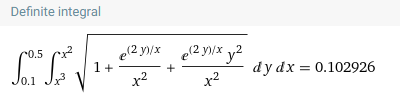

O volume abaixo da mesma região é calculado por:
$$
Volume = \int_{0.1}^{0.5} \int_{x^3}^{x^2} e^{y/x}\, dydx
$$

In [13]:
f = lambda x, y: math.e**(y/x) #definindo a função f(x,y)

a = 0.1 #limite inferior de x 
b = 0.5 #limite superior de x
c_func = lambda x: x**3 #limite inferior de y em função de x
d_func = lambda x: x**2 #limite superior de y em função de x

inicio = time.time()

volume = calcula_integral_dupla(n,a,b,c_func,d_func,f) #calculando o volume
print(f"O volume da região é: {volume} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio
print(f"A duração foi de: {duracao} s.")

O volume da região é: 0.03330556611623718 

O valor de n é: 6 

A duração foi de: 0.0028176307678222656 s.


#### Avaliação do resultado
A integral acima pode ser desenvolvida manualmente sem grandes dificuldades. O resultado real é $-0.5e^{0.5}-0.5e^{0.25} + 0.9e^{0.1} + 0.5e^{0.01} \ = \ 0.033305566$. Percebemos que a aproximação pela fórmula de Gauss para integração é igual ao resultado real para 9 dígitos decimais.

### Exemplo 4

Para esse exemplo, teremos que calcular o volume de um sólido de revolução.
O volume V do sólido de revolução obtido da rotação da região R em torno de γ é igual a
$$
\int \int_{R} d_{\gamma} (x,y)\ dxdy
$$

### Volume de uma calota esférica
Como podemos ver na imagem abaixo, para calcular o volume da calota esférica, temos que calcular a integral
$$
Volume = 2 \pi \int_{0.75}^{1} \int_{0}^{\sqrt{1-y^2}} x\ dxdy
$$
<img src='1.jpeg' width = '400' height = '400'>


In [27]:
n = 10

distancia = lambda x, y: x #definindo a distância entre o ponto (x,y) à reta γ

a = lambda y: y*0 #limite inferior de x 
b = lambda y: math.sqrt(1-y**2) #limite superior de x
c = 0.75 #limite inferior de y 
d = 1 #limite superior de y 

inicio = time.time()

volume = 2 * math.pi * calcula_integral_dupla(n,a,b,c,d,distancia) #calculando o volume

print(f"O volume do sólido de revolução é: {volume} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio 
print(f"A duração foi de: {duracao} s.")

O volume do sólido de revolução é: 0.17998707911191525 

O valor de n é: 10 

A duração foi de: 0.0 s.


#### Avaliação do resultado
Utilizando o wolfram para avaliar a mesma integral, chegamos que o volume da calota esférica é $0.179987$. Assim, não houve erro com $6$ casas decimais para $n=10$.
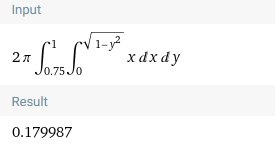

### Volume sólido de revolução
Para calcular o volume do sólido de revolução da região, em torno do eixo y, delimitada por $ x = 0, x = e^{−y^{2}}, y = −1$ e $y = 1$, temos que calcular a integral dupla
$$
Volume = 2 \pi \int_{-1}^{1} \int_{0}^{e^{-y^2}} x\ dxdy
$$

<img src='2.jpeg' width = '400' heigth = '400'>

In [28]:
n = 10

distancia = lambda x,y: x #definindo a distância entre o ponto (x,y) à reta γ

a = lambda y: 0*y #limite inferior de x 
b = lambda y: math.e ** (-y**2) #limite superior de x
c = -1 #limite inferior de y
d = 1 #limite superior de y 

inicio = time.time()

volume = 2 * math.pi * calcula_integral_dupla(n,a,b,c,d,distancia) #calculando o volume
print(f"O volume do sólido de revolução é: {volume} \n")

print(f"O valor de n é: {n} \n")

duracao = time.time() - inicio 
print(f"A duração foi de: {duracao} s.")

O volume do sólido de revolução é: 3.7582496332093873 

O valor de n é: 10 

A duração foi de: 0.0009958744049072266 s.


#### Avaliação do resultado
Utilizando o wolfram, o resultado da integral é $3.7582496342318346$. Assim, o erro para $n = 10$ foi $1.022 \times{10^{-9}}$
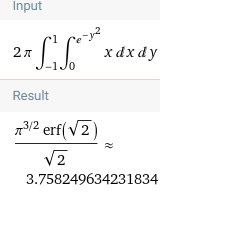

### Função main()
A função main() implementa a função calcula_integral_dupla() para avaliar os exemplos do enunciado e para calcular integrais duplas de novas funções. 
É apenas com ela que o usuário deverá interagir.

In [11]:
def main(exemplo,n,a=0,b=0,c=0,d=0,f=0):
    """Essa função irá rodar o exemplo desejado e printar os resultados. Se quiser testar os exemplos 
    Args:
        exemplo: use 0 (zero) para testar um novo exemplo e 1, 2, 3 ou 4 para os exemplos propostos no enunciado.
        n: número de pontos
        a: limite inferior de x
        b: limite superior de x
        c: limite inferior de y
        d: limite superior de y
        f: função f(x,y) a ser integrada
    Print:
        I: valor da integral
        n: número de pontos
        exemplo: qual foi o exemplo escolhido
        duração: tempo de duração do programa"""    
    
    if exemplo == 0:
        inicio = time.time()
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f" A integral dupla vale: {I} \n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
    
    elif exemplo == 1:
        inicio = time.time()
        f = lambda x, y: 1 + 0*x
        a = 0 
        b = 1
        c = 0
        d = 1
        I = calcula_integral_dupla(n,a,b,c,d,f)
        
        print(f" Item a)\n Volume do cubo: {I} \n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        inicio = time.time()
        f = lambda x, y: 1 - x - y
        a = 0
        b = 1
        c = lambda x: x*0
        d = lambda x: 1-x
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f"\n Item b)\n Volume do tetraedro: {I} \n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        
    elif exemplo == 2:
        inicio = time.time()
        f = lambda x, y: 1 + 0*x
        a = 0
        b = 1
        c = lambda x: 0*x
        d = lambda x: 1 - x**2
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f" Item a)\n A área da região é {I}\n Erro: {abs(2/3-I)}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        
        inicio = time.time()
        f = lambda x, y: 1 + 0*x
        a = lambda y: 0*y
        b = lambda y: math.sqrt(1-y)
        c = 0
        d = 1
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f"\n Item b)\n A área da região é {I}\n Erro: {abs(2/3-I)}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        
    elif exemplo == 3:
        inicio = time.time()
        f = lambda x, y: math.e**(y/x)
        a = 0.1
        b = 0.5
        c = lambda x: x**3
        d = lambda x: x**2
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f" Item a)\n A área da região é: {I}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        
        inicio = time.time()
        f = lambda x, y: math.sqrt((-y/x * math.e**(y/x))**2 + (1/x * math.e**(y/x))**2 + 1) 
        a = 0.1 
        b = 0.5 
        c = lambda x: x**3 
        d = lambda x: x**2 
        I = calcula_integral_dupla(n,a,b,c,d,f)
        print(f"\n Item b)\n O volume abaixo da região é: {I}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
    
    elif exemplo == 4:
        inicio = time.time()
        f = lambda x, y: x 
        a = lambda y: y*0 
        b = lambda y: math.sqrt(1-y**2) 
        c = 0.75  
        d = 1 
        I = calcula_integral_dupla(n,a,b,c,d,f)
        volume = 2*math.pi*I
        print(f" Item a)\n O volume da calota esférica é: {volume}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")
        
        inicio = time.time()
        f = lambda x,y: x
        a = lambda y: 0*y 
        b = lambda y: math.e ** (-y**2)
        c = -1
        d = 1 
        I = calcula_integral_dupla(n,a,b,c,d,f)
        volume = 2*math.pi*I
        print(f"\n Item b)\n O volume do sólido de revolução é: {volume}\n n = {n} \n Exemplo: {exemplo} \n Duração: {time.time() - inicio}")


### Instruções
Para utilizar a função main(), siga os seguintes passos:

#### Caso deseje testar os exemplos do enunciado:

<ol>
    <li> Escolha o exemplo a ser testado (de 1 a 4)</li>
    <li> Escolha o número n de pontos a serem usados</li>
    <li> Chame a função, por exemplo: main(1,10)</li>
    <li> Obs: para os exemplos do enunciado, os limites e a função f(x,y) já foram determinados e o usuário não precisa definí-los</li>
</ol>
    
    
#### Caso deseje testar uma nova função
<ol>
    <li> Utilize o argumento $exemplo=0$, na função main()</li>
        <ul>
            <li>Para o caso que $n$ é $1,2,3$ ou $4$, as entradas $a,b,c,d,f$ já estarão determinadas na função $main()$, por isso utilize $a=b=c=d=f=0$</li>
            <li>Para o caso que $n$ é $0$, as entradas $a,b,c,d,f$ deverão ser determinadas da forma desejada</li>
        </ul>    
    <li> Escolha o número $n$ de pontos a serem usados</li>   
    <li> Defina os limites de integração:
        <ul>
            <li>Os limites de integração $(a,b)$ podem ser funções de $y$. Pode ser útil utilizar $a \ = \ lambda \ y: \ a(y)$ e $b \ = \ lambda  \ y: b(y)$</li>
            <li>Os limites de integração $(c,d)$ podem ser funções de $x$. Novamente, pode ser útil utilizar $c \ = \ lambda \ x: \ c(x)$ e $d \ = \ lambda  \ x: d(x)$</li>
            <li>É importante notar que, se $(a,b)$ forem constantes, mas $(c,d)$ estiverem em função de $x$, devemos definir tanto $c$ quanto $d$ como uma função. Ou seja, se $c=0$ e $d=x^2$, devemos definir $c=lambda \ x: \ 0*x$ e $d=lambda \ x: \ x**2$</li>
            <li>Similarmente, se $(c,d)$ forem constantes, mas $(a,b)$ estiverem em função de y, devemos definir tanto $a$ quanto $b$ como uma função. Ou seja, se $a=-2$ e $d=y+1$, devemos definir $a=lambda \ y: \ -2+0*y$ e $b=lambda \ y: \ y+1$</li>
            <li>Note que a função constante é definida como $g(x) \ = \ lambda \ x: k \ + \ 0*x$, ou como $h(y) \ = \ lambda \ y: k \ + \ 0*y$
        </ul>
    </li>  
    <li>Defina a função $f(x,y)$:
        <ul>
            <li>Impletar a função $f(x,y)$ da forma $f = lambda \ x, y: f(x,y)$ pode ser útil </li>
            <li>Caso a função seja constante, use a sintaxe $f = lambda \ x, \ y: k + 0*x$ onde $k$ é a constante </li>
        </ul> 
    </li>
    <li>Use $exemplo,n,a,b,c,d,f$ como parâmetros na função $main()$ na seguinte ordem:
    $main(exemplo,n,a,b,c,d,f)$</li>
</ol>



### Exemplos
Abaixo, vamos reproduzir os exemplos 1, 2, 3 e 4.

#### Exemplo 1

In [12]:
main(1,8)

 Item a)
 Volume do cubo: 1.0 
 n = 8 
 Exemplo: 1 
 Duração: 0.0

 Item b)
 Volume do tetraedro: 0.16666666666666669 
 n = 8 
 Exemplo: 1 
 Duração: 0.0009970664978027344


#### Exemplo 2

In [13]:
main(2,8)

 Item a)
 A área da região é 0.6666666666666666
 Erro: 0.0
 n = 8 
 Exemplo: 2 
 Duração: 0.0

 Item b)
 A área da região é 0.6668355801001764
 Erro: 0.0001689134335097764
 n = 8 
 Exemplo: 2 
 Duração: 0.0


#### Exemplo 3

In [32]:
main(3,10)

 Item a)
 A área da região é: 0.03330556611623208
 n = 10 
 Exemplo: 3 
 Duração: 0.0

 Item b)
 O volume abaixo da região é: 0.10292628027572366
 n = 10 
 Exemplo: 3 
 Duração: 0.0009949207305908203


#### Exemplo 4

In [33]:
main(4,6)

 Item a)
 O volume da calota esférica é: 0.17998707911191517
 n = 6 
 Exemplo: 4 
 Duração: 0.0009987354278564453

 Item b)
 O volume do sólido de revolução é: 3.7581650328967093
 n = 6 
 Exemplo: 4 
 Duração: 0.0


### Outros exemplos
Abaixo, vamos visualizar como aplicar a função main para outras funções

In [14]:
#exemplo = 0
#n = 10 
#f(x,y) = x^2 * y^2 + x * y^3
#a = -2
#b = 2
#c = -2
#d = 2
main(0,10,-2,2,-2,2, lambda x,y: x**2 * y**2 + x * y**3)

 A integral dupla vale: 28.444444444444446 
 n = 10 
 Exemplo: 0 
 Duração: 0.0


In [15]:
#exemplo = 0
#n = 10
#f(x,y) = (1 - y^3)^(1/2)
#a = y - 1
#b = y
#c = 0
#d = 1
main(0, 10, lambda y: y-1, lambda y: y,0, 1, lambda x,y: math.sqrt(1 - y**3))

 A integral dupla vale: 0.8414646377814005 
 n = 10 
 Exemplo: 0 
 Duração: 0.0


## Resultados

Como podemos ver, a utilização da quadratura de Gauss é uma boa aproximação, não apenas para polinômios, mas também para outras funções. Ademais, a expansão do conceito para calcular integrais duplas nos permitiu alcançar resultados com erros pequenos para os exemplos propostos.